<a href="https://colab.research.google.com/github/akbarehsani/backsample2/blob/master/simple_image_classification_cnn_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

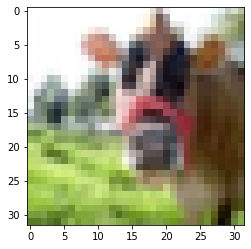

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar100 
from keras.utils import np_utils
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=cifar100.load_data()
plt.imshow(X_train[0])
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization


In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
class_num=y_test.shape[1]
print(class_num)
print(X_train.shape[1:])

100
(32, 32, 3)


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Flatten())
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Dense(class_num,activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Dense(class_num,activation='softmax'))




In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 dropout_13 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                     

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=100)

Epoch 1/20


ValueError: ignored

In [ ]:
for k,v in history.history.items():
  print(k)


loss
accuracy
val_loss
val_accuracy


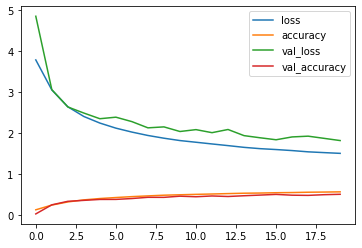

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

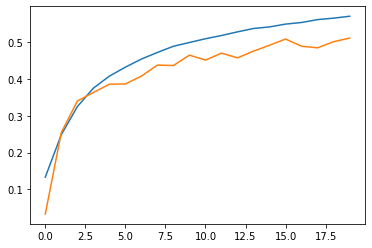

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
model.save('CNN_cifar100.h5')

In [ ]:
model2=load_model('CNN_cifar100.h5')

In [ ]:
list=model2.predict(X_test[0:10])
print(list)
np.max(list)


NameError: ignored